In [2]:
# %matplotlib notebook
%matplotlib inline

In [62]:
import csv 
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
from pprint import pprint
from scipy.stats import linregress
import math

In [5]:
csv1 = "hpi-data-2016.csv"
csv2 = "HDI_2016_Statistical_Annex_Table_1.csv"
csv3 = "Human development index (HDI)_historical.csv"
csv4 = "financial_data.csv"

In [36]:
#human happiness complete data 
hpi_complete_data = pd.read_csv(csv1, encoding="ISO-8859-1")

#human development index 
hdi_statistical_data = pd.read_csv(csv2)
hdi_historical_data = pd.read_csv(csv3, encoding="ISO-8859-1", skiprows=1)
financial_data = pd.read_csv(csv4, encoding="ISO-8859-1")

#df_columns = hdi_historical_data.columns
#df_years = df_columns[2:]



In [4]:
# df4 = pd.pivot_table(df2,values='Value', index='Date', columns='Type'])

In [7]:
hdi_historical = hdi_historical_data.dropna(axis=0, how="all").dropna(axis=1, how= "all")

#hdi historical rank sorted
hdi_historical_sorted_rank = hdi_historical.sort_values(by=["HDI Rank (2015)"])
hdi_historical_sorted_rank.head()

,HDI Rank (2015),Country,1990,1991,1992,1993,1994,1995,1996,1997,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
124,1,Norway,0.849,0.855,0.862,0.870,0.884,0.883,0.888,0.895,...,0.934,0.936,0.936,0.936,0.939,0.941,0.942,0.945,0.948,0.949
8,2,Australia,0.866,0.867,0.871,0.874,0.876,0.885,0.888,0.891,...,0.918,0.921,0.925,0.927,0.927,0.930,0.933,0.936,0.937,0.939
162,2,Switzerland,0.831,0.833,0.835,0.840,0.842,0.846,0.853,0.863,...,0.911,0.914,0.916,0.920,0.932,0.932,0.934,0.936,0.938,0.939
63,4,Germany,0.801,0.809,0.814,0.822,0.828,0.834,0.840,0.845,...,0.898,0.903,0.906,0.907,0.912,0.916,0.919,0.920,0.924,0.926
150,5,Singapore,0.718,0.729,0.740,0.751,0.763,0.773,0.783,0.795,...,0.873,0.880,0.887,0.889,0.911,0.917,0.920,0.922,0.924,0.925


In [30]:
#hpi_data.dropna(axis=[0,1], how='all')

#human happiness index dropped NaN
hpi_df = hpi_complete_data.dropna(axis=0, how='all').dropna(axis=1, how='all')
hpi_df.head()

,HPI Rank,Country,Region,Average Life Expectancy,Average Wellbeing (0-10),Happy Life Years,Footprint (gha/capita),Inequality of Outcomes,Inequality-adjusted Life Expectancy,Inequality-adjusted Wellbeing,Happy Planet Index,GDP/capita,Population,GINI index
0,110.0,Afghanistan,Middle East and North Africa,59.7,3.8,12.4,0.8,43%,38.3,3.4,20.2,691.0,"29,726,803",Data unavailable
1,13.0,Albania,Post-communist,77.3,5.5,34.4,2.2,17%,69.7,5.1,36.8,4247.0,"2,900,489",29
2,30.0,Algeria,Middle East and North Africa,74.3,5.6,30.5,2.1,24%,60.5,5.2,33.3,5584.0,"37,439,427",Data unavailable
3,19.0,Argentina,Americas,75.9,6.5,40.2,3.1,16%,68.3,6.0,35.2,14357.0,"42,095,224",42.5
4,73.0,Armenia,Post-communist,74.4,4.3,24.0,2.2,22%,66.9,3.7,25.7,3566.0,"2,978,339",30.5


In [10]:
#human development index statistical data dropped NaN
hdi_stat = hdi_statistical_data.dropna(axis=0, how='all').dropna(axis=1, how='all')

#merged dataframes-- hdi statistical and hpi on country name
merged_df= pd.merge(hdi_stat, hpi_df, on = "Country")


#####merge hdi statistical with GNH (gross national happiness) index by country name. 


In [17]:
merged_df.head()

,HDI rank,Country,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,HDI rank.1,Development Bucket,...,Average Wellbeing (0-10),Happy Life Years,Footprint (gha/capita),Inequality of Outcomes,Inequality-adjusted Life Expectancy,Inequality-adjusted Wellbeing,Happy Planet Index,GDP/capita,Population,GINI index
0,1,Norway,0.949,81.7,17.7,12.7,"67,614",5,1,VERY HIGH,...,7.7,57.1,5.0,7%,78.6,7.4,36.8,"$101,564","5,018,573",25.9
1,2,Australia,0.939,82.5,20.4,13.2,"42,822",19,3,VERY HIGH,...,7.2,53.1,9.3,8%,78.6,6.9,21.2,"$67,646","22,728,254",Data unavailable
2,2,Switzerland,0.939,83.1,16.0,13.4,"56,364",7,2,VERY HIGH,...,7.8,59.3,5.8,6%,79.4,7.6,34.3,"$83,209","7,996,861",31.6
3,4,Germany,0.926,81.1,17.1,13.2,"45,000",13,4,VERY HIGH,...,6.7,48.2,5.3,8%,77.6,6.4,29.8,"$44,011","80,425,823",Data unavailable
4,5,Denmark,0.925,80.4,19.2,12.7,"44,519",13,6,VERY HIGH,...,7.5,54.4,5.5,7%,76.8,7.2,32.7,"$57,636","5,591,572",29.1


In [31]:
grouped_df = merged_df.groupby(['Development Bucket'])
#yes_df = pd.DataFrame(grouped_df.mean(), index = ['LOW', 'MEDIUM', 'HIGH', 'VERY HIGH'])

grouped_df.mean()


,HDI rank,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,GNI per capita rank minus HDI rank,HDI rank.1,HPI Rank,Average Life Expectancy,Average Wellbeing (0-10),Happy Life Years,Footprint (gha/capita),Inequality-adjusted Life Expectancy,Inequality-adjusted Wellbeing,Happy Planet Index
Development Bucket,,,,,,,,,,,,,,,
HIGH,77.588235,0.756441,74.567647,13.935294,9.444118,5.117647,77.794118,52.852941,73.955882,5.641176,32.735294,3.223529,65.485294,5.161765,29.764706
LOW,168.423077,0.467346,59.257692,9.515385,4.130769,0.461538,168.423077,111.307692,57.796154,4.192308,13.588462,1.269231,37.869231,3.769231,19.184615
MEDIUM,126.785714,0.631107,68.425000,11.592857,6.964286,-2.857143,126.857143,61.071429,67.507143,4.975000,23.375000,1.935714,53.285714,4.517857,28.075000
VERY HIGH,24.605263,0.882447,80.155263,16.592105,11.821053,8.921053,24.815789,59.473684,79.571053,6.463158,45.302632,5.531579,76.052632,6.084211,28.044737


In [19]:
new_df = grouped_df.mean().reset_index()

#new_df

new_df['Development Bucket'] = pd.Categorical(new_df['Development Bucket'], ["LOW", "MEDIUM", "HIGH", "VERY HIGH"])

new_df.sort_values("Development Bucket")

new_df.reindex([1,2,0,3])

new_df

,Development Bucket,HDI rank,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,GNI per capita rank minus HDI rank,HDI rank.1,HPI Rank,Average Life Expectancy,Average Wellbeing (0-10),Happy Life Years,Footprint (gha/capita),Inequality-adjusted Life Expectancy,Inequality-adjusted Wellbeing,Happy Planet Index
0,HIGH,77.588235,0.756441,74.567647,13.935294,9.444118,5.117647,77.794118,52.852941,73.955882,5.641176,32.735294,3.223529,65.485294,5.161765,29.764706
1,LOW,168.423077,0.467346,59.257692,9.515385,4.130769,0.461538,168.423077,111.307692,57.796154,4.192308,13.588462,1.269231,37.869231,3.769231,19.184615
2,MEDIUM,126.785714,0.631107,68.425000,11.592857,6.964286,-2.857143,126.857143,61.071429,67.507143,4.975000,23.375000,1.935714,53.285714,4.517857,28.075000
3,VERY HIGH,24.605263,0.882447,80.155263,16.592105,11.821053,8.921053,24.815789,59.473684,79.571053,6.463158,45.302632,5.531579,76.052632,6.084211,28.044737


In [20]:
df2 = pd.DataFrame({
    'Development Bucket': ['LOW', 'MEDIUM', 'HIGH', 'VERY HIGH'],
    'num': [0, 1, 2, 3]})
df3 = pd.merge(new_df, df2, on='Development Bucket')
df3 = df3.sort_values('num')

df3

#df3.plot(kind='bar', x='Development Bucket', y='Life expectancy at birth')

,Development Bucket,HDI rank,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,GNI per capita rank minus HDI rank,HDI rank.1,HPI Rank,Average Life Expectancy,Average Wellbeing (0-10),Happy Life Years,Footprint (gha/capita),Inequality-adjusted Life Expectancy,Inequality-adjusted Wellbeing,Happy Planet Index,num
1,LOW,168.423077,0.467346,59.257692,9.515385,4.130769,0.461538,168.423077,111.307692,57.796154,4.192308,13.588462,1.269231,37.869231,3.769231,19.184615,0
2,MEDIUM,126.785714,0.631107,68.425000,11.592857,6.964286,-2.857143,126.857143,61.071429,67.507143,4.975000,23.375000,1.935714,53.285714,4.517857,28.075000,1
0,HIGH,77.588235,0.756441,74.567647,13.935294,9.444118,5.117647,77.794118,52.852941,73.955882,5.641176,32.735294,3.223529,65.485294,5.161765,29.764706,2
3,VERY HIGH,24.605263,0.882447,80.155263,16.592105,11.821053,8.921053,24.815789,59.473684,79.571053,6.463158,45.302632,5.531579,76.052632,6.084211,28.044737,3


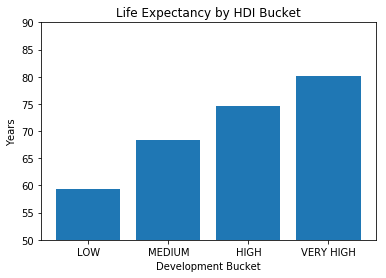

In [41]:
plt.title("Life Expectancy by HDI Bucket")
plt.xlabel("Development Bucket")
plt.ylabel("Years")

plt.ylim(50,90)


plt.bar(df3["Development Bucket"], df3["Life expectancy at birth"])

#####df3.plot(kind='bar',x='Development Bucket',y='Life expectancy at birth')


plt.show()

In [37]:
#merged dataframes-- hdi statistical and hpi on country name
finan_df = financial_data.dropna(axis=0, how='all').dropna(axis=1, how='all')
merged_df2= pd.merge(merged_df, finan_df, on = "Country")
merged_df2

,HDI rank,Country,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,HDI rank.1,Development Bucket,...,Inequality of Outcomes,Inequality-adjusted Life Expectancy,Inequality-adjusted Wellbeing,Happy Planet Index,GDP/capita,Population,GINI index,Country Code,GDP Volatility,Median Inflation
0,1,Norway,0.949,81.7,17.7,12.7,"67,614",5,1,VERY HIGH,...,7%,78.6,7.4,36.8,"$101,564","5,018,573",25.9,NOR,1.81,3.40%
1,2,Australia,0.939,82.5,20.4,13.2,"42,822",19,3,VERY HIGH,...,8%,78.6,6.9,21.2,"$67,646","22,728,254",Data unavailable,AUS,1.73,3.30%
2,2,Switzerland,0.939,83.1,16.0,13.4,"56,364",7,2,VERY HIGH,...,6%,79.4,7.6,34.3,"$83,209","7,996,861",31.6,CHE,1.57,1.80%
3,4,Germany,0.926,81.1,17.1,13.2,"45,000",13,4,VERY HIGH,...,8%,77.6,6.4,29.8,"$44,011","80,425,823",Data unavailable,DEU,1.94,1.50%
4,5,Denmark,0.925,80.4,19.2,12.7,"44,519",13,6,VERY HIGH,...,7%,76.8,7.2,32.7,"$57,636","5,591,572",29.1,DNK,2.29,3.40%
5,7,Netherlands,0.924,81.7,18.1,11.9,"46,326",8,6,VERY HIGH,...,4%,78.2,7.5,35.3,"$49,475","16,754,962",28,NLD,2.27,2.50%
6,8,Ireland,0.923,81.1,18.6,12.3,"43,798",11,8,VERY HIGH,...,8%,77.5,6.7,30.0,"$48,977","4,586,897",32.5,IRL,4.47,3.80%
7,9,Iceland,0.921,82.7,19.0,12.2,"37,065",20,9,VERY HIGH,...,5%,79.8,7.4,31.1,"$44,259","320,716",26.9,ISL,4.25,7.30%
8,10,Canada,0.920,82.2,16.3,13.1,"42,582",12,9,VERY HIGH,...,9%,77.8,7.1,23.9,"$52,738","34,751,476",Data unavailable,CAN,2.15,2.70%
9,13,New Zealand,0.915,82.0,19.2,12.5,"32,870",20,13,VERY HIGH,...,8%,77.7,6.9,31.3,"$39,505","4,408,100",Data unavailable,NZL,2.45,3.40%


In [33]:
# graph Happy Planet Index vs GDP per capita
onlylow = merged_df2.loc[merged_df2['Development Bucket'] == "LOW", :]
onlymed = merged_df2.loc[merged_df2['Development Bucket'] == "MEDIUM", :]
onlyhigh = merged_df2.loc[merged_df2['Development Bucket'] == "HIGH", :]
onlyvhigh = merged_df2.loc[merged_df2['Development Bucket'] == "VERY HIGH", :]

xlow = onlylow['GDP/capita']
xmed = onlymed['GDP/capita']
xhigh = onlyhigh['GDP/capita']
xvhigh = onlyvhigh['GDP/capita']

ylow = onlylow['Happy Planet Index']
ymed = onlymed['Happy Planet Index']
yhigh = onlyhigh['Happy Planet Index']
yvhigh = onlyvhigh['Happy Planet Index']

zlow = onlylow['Population']
zmed = onlymed['Population']
zhigh = onlyhigh['Population']
zvhigh = onlyvhigh['Population']

In [34]:
merged_df2.dtypes

HDI rank                                    int64
Country                                    object
Human Development Index (HDI)             float64
Life expectancy at birth                  float64
Expected years of schooling               float64
Mean years of schooling                   float64
Gross national income (GNI) per capita     object
GNI per capita rank minus HDI rank          int64
HDI rank.1                                  int64
Development Bucket                         object
HPI Rank                                  float64
Region                                     object
Average Life \nExpectancy                 float64
Average Wellbeing\n(0-10)                 float64
Happy Life Years                          float64
Footprint\n(gha/capita)                   float64
Inequality of Outcomes                     object
Inequality-adjusted Life Expectancy       float64
Inequality-adjusted Wellbeing             float64
Happy Planet Index                        float64


In [84]:
df33 = merged_df2[["Country","Happy Planet Index","GDP/capita", "Development Bucket", "Population", "GDP Volatility", "Median Inflation"]]
df33 = df33.set_index('GDP/capita')
df33 = df33.sort_index(ascending=True)
df33 = df33.reset_index()
df33['GDP/capita'] = df33['GDP/capita'].str.replace(',','')
df33['GDP/capita'] = df33['GDP/capita'].str.replace('$','').astype('float')
df33['Population'] = df33['Population'].str.replace(',','')
df33['Population'] = df33['Population'].str.replace('$','').astype('float')
df33['Median Inflation'] = df33['Median Inflation'].str.replace('%','').astype('float')
df33.head()

,GDP/capita,Country,Happy Planet Index,Development Bucket,Population,GDP Volatility,Median Inflation
0,1019.0,Senegal,21.9,LOW,13780108.0,3.55,2.2
1,1159.0,Lesotho,16.7,LOW,2057331.0,5.77,11.2
2,1185.0,Kenya,24.2,MEDIUM,42542978.0,4.50,9.3
3,1222.0,Cameroon,16.7,LOW,21659488.0,5.49,4.0
4,1266.0,Pakistan,31.5,MEDIUM,177392252.0,2.35,7.2


In [108]:
# graph Happy Planet Index vs GDP per capita
onlylow = df33.loc[merged_df2['Development Bucket'] == "LOW", :]
onlymed = df33.loc[merged_df2['Development Bucket'] == "MEDIUM", :]
onlyhigh = df33.loc[merged_df2['Development Bucket'] == "HIGH", :]
onlyvhigh = df33.loc[merged_df2['Development Bucket'] == "VERY HIGH", :]

xlow = onlylow['GDP/capita']
xmed = onlymed['GDP/capita']
xhigh = onlyhigh['GDP/capita']
xvhigh = onlyvhigh['GDP/capita']

ylow = onlylow['Happy Planet Index']
ymed = onlymed['Happy Planet Index']
yhigh = onlyhigh['Happy Planet Index']
yvhigh = onlyvhigh['Happy Planet Index']

zlow = onlylow['Population']
zmed = onlymed['Population']
zhigh = onlyhigh['Population']
zvhigh = onlyvhigh['Population']

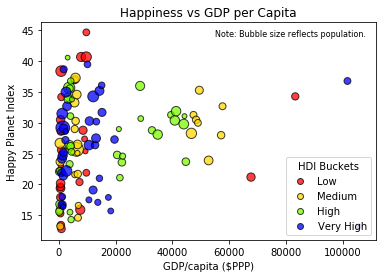

In [113]:
l = plt.scatter(xlow, ylow, marker="o", facecolors="red", edgecolors="black", s=zlow**(1/float(4)), alpha=.75)
m = plt.scatter(xmed, ymed, marker="o", facecolors="gold", edgecolors="black", s=zmed**(1/float(4)), alpha=.75)
h = plt.scatter(xhigh, yhigh, marker="o", facecolors="lawngreen", edgecolors="black", s=zhigh**(1/float(4)), alpha=.75)
vh = plt.scatter(xvhigh, yvhigh, marker="o", facecolors="blue", edgecolors="black", s=zvhigh**(1/float(4)), alpha=.75)
plt.title("Happiness vs GDP per Capita")
plt.xlabel("GDP/capita ($PPP)")
plt.ylabel("Happy Planet Index")

# Create a legend
lgnd = plt.legend((l, m, h, vh), ('Low', 'Medium', 'High', 'Very High'),loc="best",title="HDI Buckets")
for handle in lgnd.legendHandles:
    handle.set_sizes([36.0])
    
# Incorporate a text label regarding circle size
textstr = 'Note: Bubble size reflects population.'
plt.text(55000,44,textstr, fontsize=8)

# Save Figure
plt.savefig("Images/HappinessVsGDP.png")

In [105]:
# graph Happy Planet Index vs GDP per capita
onlylow = df33.loc[merged_df2['Development Bucket'] == "LOW", :]
onlymed = df33.loc[merged_df2['Development Bucket'] == "MEDIUM", :]
onlyhigh = df33.loc[merged_df2['Development Bucket'] == "HIGH", :]
onlyvhigh = df33.loc[merged_df2['Development Bucket'] == "VERY HIGH", :]

xlow = onlylow['GDP/capita']
xmed = onlymed['GDP/capita']
xhigh = onlyhigh['GDP/capita']
xvhigh = onlyvhigh['GDP/capita']

ylow = onlylow['GDP Volatility']
ymed = onlymed['GDP Volatility']
yhigh = onlyhigh['GDP Volatility']
yvhigh = onlyvhigh['GDP Volatility']

zlow = onlylow['Population']
zmed = onlymed['Population']
zhigh = onlyhigh['Population']
zvhigh = onlyvhigh['Population']

# regression line
#(slope, intercept, _, _, _) = linregress(xlow, ylow)
#fit = slope * xlow + intercept
#ax.plot(xlow, fit, 'b--')

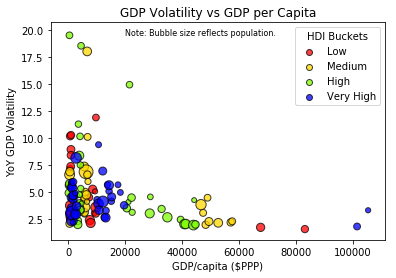

In [107]:
l = plt.scatter(xlow, ylow, marker="o", facecolors="red", edgecolors="black", s=zlow**(1/float(4)), alpha=.75)
m = plt.scatter(xmed, ymed, marker="o", facecolors="gold", edgecolors="black", s=zmed**(1/float(4)), alpha=.75)
h = plt.scatter(xhigh, yhigh, marker="o", facecolors="lawngreen", edgecolors="black", s=zhigh**(1/float(4)), alpha=.75)
vh = plt.scatter(xvhigh, yvhigh, marker="o", facecolors="blue", edgecolors="black", s=zvhigh**(1/float(4)), alpha=.75)
plt.title("GDP Volatility vs GDP per Capita")
plt.xlabel("GDP/capita ($PPP)")
plt.ylabel("YoY GDP Volatility")

# Create a legend
lgnd = plt.legend((l, m, h, vh), ('Low', 'Medium', 'High', 'Very High'),loc="best",title="HDI Buckets")
for handle in lgnd.legendHandles:
    handle.set_sizes([36.0])
    
# Incorporate a text label regarding circle size
textstr = 'Note: Bubble size reflects population.'
plt.text(20000,19.5,textstr, fontsize=8)

# Save Figure
plt.savefig("Images/VolatilityVsGDP.png")

In [101]:
# graph Happy Planet Index vs GDP per capita
onlylow = df33.loc[merged_df2['Development Bucket'] == "LOW", :]
onlymed = df33.loc[merged_df2['Development Bucket'] == "MEDIUM", :]
onlyhigh = df33.loc[merged_df2['Development Bucket'] == "HIGH", :]
onlyvhigh = df33.loc[merged_df2['Development Bucket'] == "VERY HIGH", :]

xlow = onlylow['Median Inflation']
xmed = onlymed['Median Inflation']
xhigh = onlyhigh['Median Inflation']
xvhigh = onlyvhigh['Median Inflation']

ylow = onlylow['Happy Planet Index']
ymed = onlymed['Happy Planet Index']
yhigh = onlyhigh['Happy Planet Index']
yvhigh = onlyvhigh['Happy Planet Index']

zlow = onlylow['Population']
zmed = onlymed['Population']
zhigh = onlyhigh['Population']
zvhigh = onlyvhigh['Population']

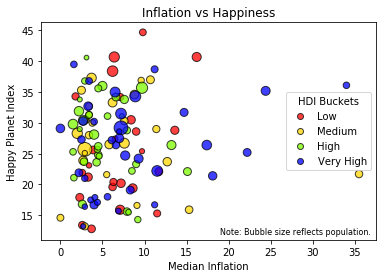

In [104]:
l = plt.scatter(xlow, ylow, marker="o", facecolors="red", edgecolors="black", s=zlow**(1/float(4)), alpha=.75)
m = plt.scatter(xmed, ymed, marker="o", facecolors="gold", edgecolors="black", s=zmed**(1/float(4)), alpha=.75)
h = plt.scatter(xhigh, yhigh, marker="o", facecolors="lawngreen", edgecolors="black", s=zhigh**(1/float(4)), alpha=.75)
vh = plt.scatter(xvhigh, yvhigh, marker="o", facecolors="blue", edgecolors="black", s=zvhigh**(1/float(4)), alpha=.75)
plt.title("Inflation vs Happiness")
plt.xlabel("Median Inflation")
plt.ylabel("Happy Planet Index")

# Create a legend
lgnd = plt.legend((l, m, h, vh), ('Low', 'Medium', 'High', 'Very High'),loc="best",title="HDI Buckets")
for handle in lgnd.legendHandles:
    handle.set_sizes([36.0])
    
# Incorporate a text label regarding circle size
textstr = 'Note: Bubble size reflects population.'
plt.text(19,12,textstr, fontsize=8)

# Save Figure
plt.savefig("Images/InflationVsHappiness.png")

In [88]:
# graph Happy Planet Index vs GDP per capita
onlylow = df33.loc[merged_df2['Development Bucket'] == "LOW", :]
onlymed = df33.loc[merged_df2['Development Bucket'] == "MEDIUM", :]
onlyhigh = df33.loc[merged_df2['Development Bucket'] == "HIGH", :]
onlyvhigh = df33.loc[merged_df2['Development Bucket'] == "VERY HIGH", :]

xlow = onlylow['GDP Volatility']
xmed = onlymed['GDP Volatility']
xhigh = onlyhigh['GDP Volatility']
xvhigh = onlyvhigh['GDP Volatility']

ylow = onlylow['Happy Planet Index']
ymed = onlymed['Happy Planet Index']
yhigh = onlyhigh['Happy Planet Index']
yvhigh = onlyvhigh['Happy Planet Index']

zlow = onlylow['Population']
zmed = onlymed['Population']
zhigh = onlyhigh['Population']
zvhigh = onlyvhigh['Population']

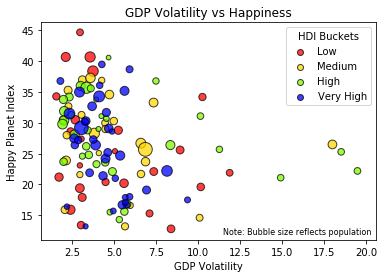

In [100]:
l = plt.scatter(xlow, ylow, marker="o", facecolors="red", edgecolors="black", s=zlow**(1/float(4)), alpha=.75)
m = plt.scatter(xmed, ymed, marker="o", facecolors="gold", edgecolors="black", s=zmed**(1/float(4)), alpha=.75)
h = plt.scatter(xhigh, yhigh, marker="o", facecolors="lawngreen", edgecolors="black", s=zhigh**(1/float(4)), alpha=.75)
vh = plt.scatter(xvhigh, yvhigh, marker="o", facecolors="blue", edgecolors="black", s=zvhigh**(1/float(4)), alpha=.75)
plt.title("GDP Volatility vs Happiness")
plt.xlabel("GDP Volatility")
plt.ylabel("Happy Planet Index")

# Create a legend
lgnd = plt.legend((l, m, h, vh), ('Low', 'Medium', 'High', 'Very High'),loc="best",title="HDI Buckets")
for handle in lgnd.legendHandles:
    handle.set_sizes([36.0])
    
# Incorporate a text label regarding circle size
textstr = 'Note: Bubble size reflects population'
plt.text(11.5,12,textstr, fontsize=8)

# Save Figure
plt.savefig("Images/VolatilityVsHappiness.png")